In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

crashes = pd.read_csv('dataset/crashes_severity_2017.csv')
people = pd.read_csv('dataset/people_2017.csv')
vehicles = pd.read_csv('dataset/vehicles_2017.csv')

In [12]:
crashes.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851294 entries, 0 to 851293
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                851294 non-null  object 
 1   CRASH_DATE                     851294 non-null  object 
 2   POSTED_SPEED_LIMIT             851294 non-null  int64  
 3   WEATHER_SEVERITY               851294 non-null  int64  
 4   LIGHTING_SEVERITY              851294 non-null  int64  
 5   FIRST_CRASH_TYPE               851294 non-null  object 
 6   TRAFFICWAY_TYPE                851294 non-null  object 
 7   ALIGNMENT                      851294 non-null  object 
 8   ROADWAY_SEVERITY               851294 non-null  int64  
 9   CRASH_TYPE                     851294 non-null  object 
 10  DAMAGE_SEVERITY                851294 non-null  int64  
 11  PRIM_CONTRIBUTORY_CAUSE        851294 non-null  object 
 12  SEC_CONTRIBUTORY_CAUSE        

In [13]:
crashes.describe(include='all')

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_SEVERITY,LIGHTING_SEVERITY,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SEVERITY,CRASH_TYPE,...,LATITUDE,LONGITUDE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_DAY_OF_WEEK
count,851294,851294,851294.000000,851294.000000,851294.000000,851294,851294,851294,851294.000000,851294,...,849876.000000,849876.000000,851294.000000,849372,849384.000000,849384.000000,849384.000000,849384.000000,849384.000000,851294.000000
unique,851294,558184,NaN,NaN,NaN,18,20,6,NaN,2,...,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,cb0ca76762ca65feacb1f6513312f96f2a05629bd8a866...,2020-12-29 17:00:00,NaN,NaN,NaN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,NaN,NO INJURY / DRIVE AWAY,...,NaN,NaN,NaN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,30,NaN,NaN,NaN,198087,367944,831343,NaN,612235,...,NaN,NaN,NaN,725166,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.476466,0.254873,0.358268,NaN,NaN,NaN,0.014438,NaN,...,41.855268,-87.674074,2.037235,NaN,0.201760,0.001236,0.020409,0.113578,0.066538,4.119114
std,NaN,NaN,5.922811,0.840448,0.713295,NaN,NaN,NaN,0.769298,NaN,...,0.329326,0.668306,0.460204,NaN,0.581627,0.038188,0.166982,0.433837,0.330791,1.982477
min,NaN,NaN,0.000000,-1.000000,-1.000000,NaN,NaN,NaN,-1.000000,NaN,...,0.000000,-87.936193,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,30.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,...,41.783605,-87.722176,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,NaN,NaN,30.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,...,41.874957,-87.674793,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,NaN,NaN,30.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,...,41.924791,-87.634148,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000


In [14]:
crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'])

In [15]:
crashes['CRASH_YEAR'] = crashes['CRASH_DATE'].dt.year
crashes['CRASH_MONTH'] = crashes['CRASH_DATE'].dt.month
crashes['CRASH_DAY'] = crashes['CRASH_DATE'].dt.day
crashes['CRASH_HOUR'] = crashes['CRASH_DATE'].dt.hour

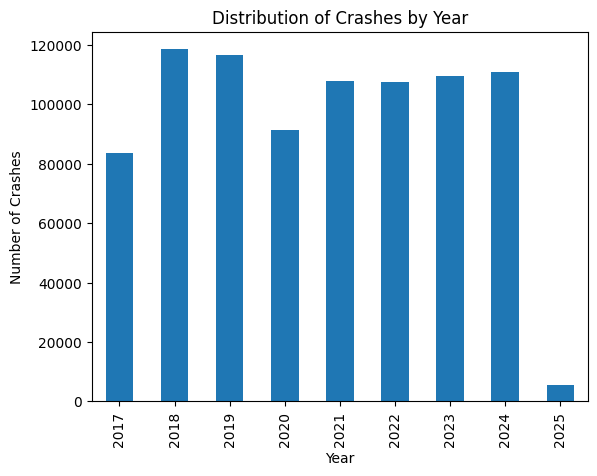

In [16]:
# distribution of crashes by year
crashes['CRASH_YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()


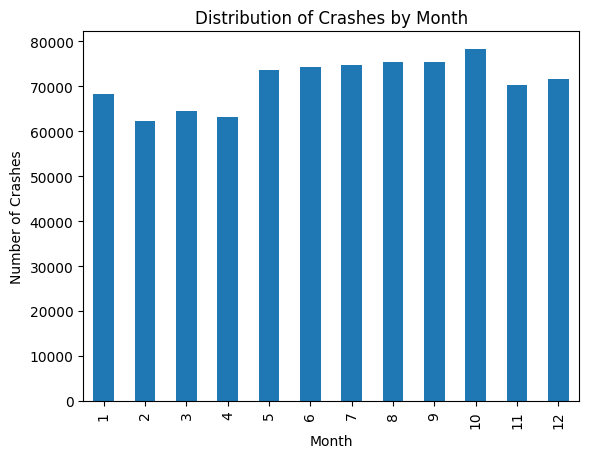

In [17]:
# distribution of crashes by month
crashes['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()


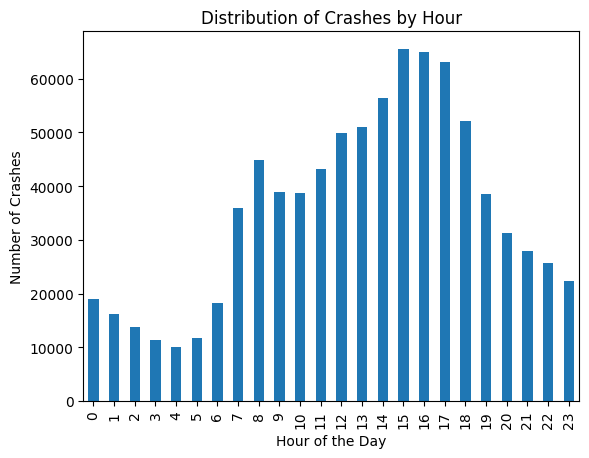

In [18]:
# Plot the distribution of crashes by hour
crashes['CRASH_HOUR'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

<Axes: xlabel='CRASH_DAY_OF_WEEK'>

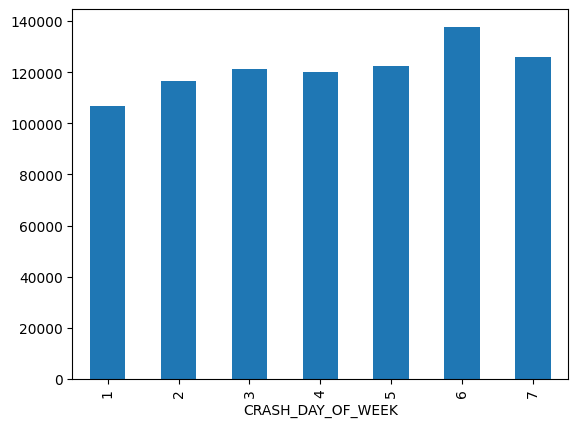

In [19]:
# day_of_the_week DISTRIBUTION
crashes['CRASH_DAY_OF_WEEK'].value_counts().sort_index().plot(kind='bar')


In [23]:
crashes['CRASH_DAY_OF_WEEK'] = crashes['CRASH_DATE'].dt.dayofweek

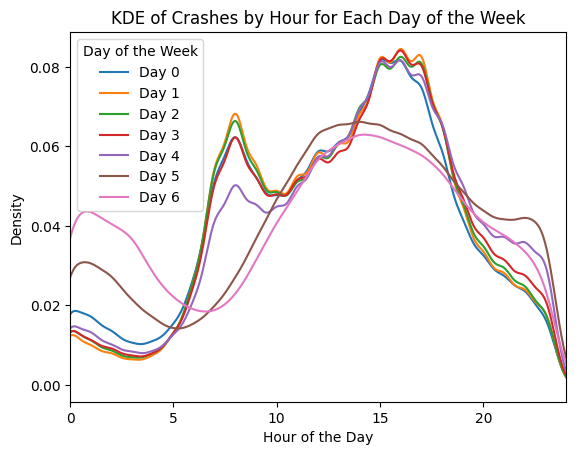

In [26]:
# Plot KDE for different days of the week
for day in range(0, 7):
    subset = crashes[crashes['CRASH_DAY_OF_WEEK'] == day]
    subset['CRASH_HOUR'].plot(kind='kde', label=f'Day {day}')

plt.title('KDE of Crashes by Hour for Each Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.legend(title='Day of the Week')
plt.show()